In [4]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
dh = pd.read_csv('../dataset/mh_2010_2012_2014.csv', sep=',')

In [6]:
da = pd.read_csv('../../dataset/TEDSA_5yrs.csv', sep=',')

In [7]:
grouped_yst = da.groupby(['YEAR','STFIPS'], sort=True).agg({'STFIPS': len}).rename(columns={'STFIPS':'NAdmissions'}).reset_index()

In [27]:
aa2010 = grouped_yst.groupby(['YEAR']).get_group(2010).reset_index()[['STFIPS','NAdmissions']].sort_values(by=['NAdmissions'], ascending=False)
aa2010.head(5)

,STFIPS,NAdmissions
31,36,311436
4,6,166587
21,25,90624
34,39,87446
5,8,79196


In [26]:
#group the mental health services data by year and state(LST)
grouped_ys = dh.groupby(['YEAR','LST'], sort=True).agg({'LST': len}).rename(columns={'LST':'NProviders'}).reset_index()
grouped_ys.head(5)

,YEAR,LST,NProviders
0,2010,AK,58
1,2010,AL,194
2,2010,AR,174
3,2010,AZ,146
4,2010,CA,927


In [25]:
sa2010 = grouped_ys.groupby(['YEAR']).get_group(2010).reset_index()[['LST','NProviders']].sort_values(by=['NProviders'], ascending=False)
sa2010.head(5)

,LST,NProviders
4,CA,927
35,NY,685
39,PA,541
15,IL,512
36,OH,471


In [13]:
st = pd.read_csv('../dataset/StatesMapping.csv', sep=',')
st.columns = ['statenames', 'LST', 'STFIPS']

In [20]:
comb2010 = pd.merge(sa2010, st, on='LST', how='outer')
comb2010 = pd.merge(comb2010, aa2010, on='STFIPS', how='outer')

In [22]:
statesnm = comb2010.assign(ProvPerAdmission = comb2010[['NAdmissions']].div(comb2010.NProviders, axis=0))
statesnm.sort_values(by=['ProvPerAdmission'], ascending=False).head(5)

,LST,NProviders,statenames,STFIPS,NAdmissions,ProvPerAdmission
1,NY,685.0,New York,36,311436.0,454.651095
22,CO,185.0,Colorado,8,79196.0,428.086486
25,NC,170.0,North Carolina,37,60253.0,354.429412
26,OR,154.0,Oregon,41,52073.0,338.136364
8,MA,318.0,Massachusetts,25,90624.0,284.981132


<IPython.core.display.Javascript object>


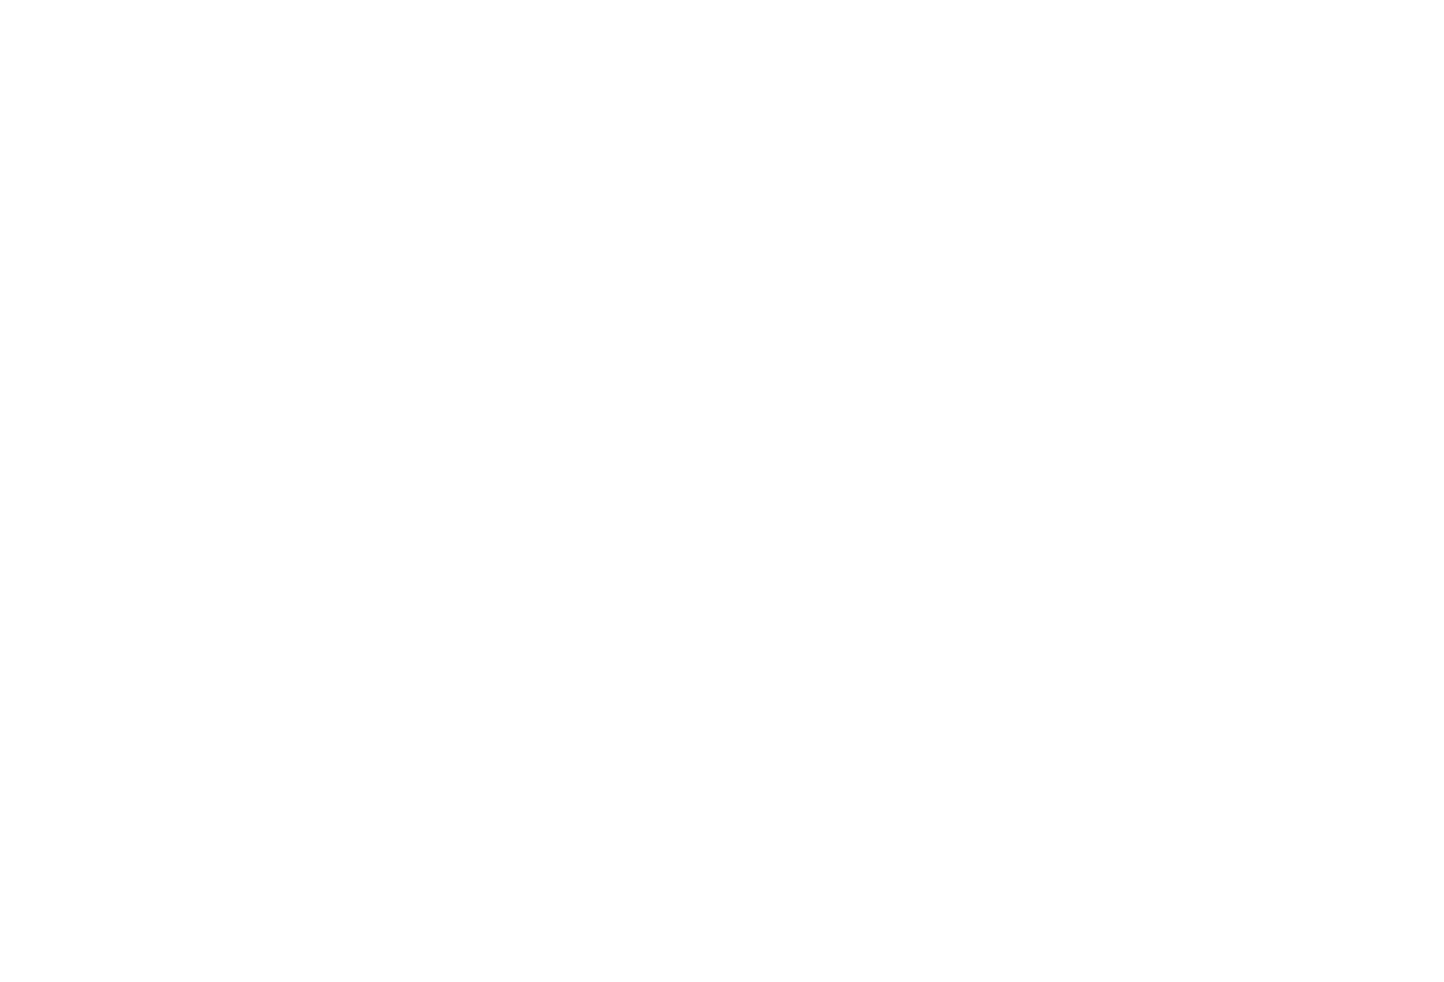

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)


# choose a color for each state based on density.
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'hot' colormap
vmin = 0; vmax = 460 # set range.

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(statesnm['ProvPerAdmission'].fillna(0).values)

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        ratios = statesnm.loc[statesnm['statenames'] == statename][['ProvPerAdmission']].values[0][0]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((ratios-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
# cycle through state names, color each one.    
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        #if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
        #    seg = list(map(lambda (x,y): (0.35*x + 1100000, 0.35*y-1300000), seg))
        #if statenames[nshape] == 'Hawaii':
        #    seg = list(map(lambda (x,y): (x + 5100000, y-900000), seg))

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)


plt.title('State Polygons by Admission-Services Ratio')

# add colorbar.
plt.colorbar(sm, ax=ax, orientation='vertical')

plt.show()
#plt.figure(figsize=(8,4))
#plt.savefig('../Week_3/adm-serv.jpg', dpi = 300)

In [28]:
#source Wikipedia
USpopulation = {
'Wyoming' : 586107,
'Wisconsin' : 5771337,
'West Virginia' : 1844128,
'Washington' : 7170351,
'North Carolina' : 10042802,
'Vermont' : 626042,
'Utah' : 2995919,
'Texas' : 27469114,
'Tennessee' : 6600299,
'South Dakota' : 858469,
'South Carolina' : 4896146,
'Rhode Island' : 1056298,
'Pennsylvania' : 12802503,
'Oregon' : 4028977,
'Oklahoma' : 3911338,
'Ohio' : 11613423,
'North Dakota' : 756927,
'Virginia' : 8382993,
'New York' : 19795791,
'New Mexico' : 2085109,
'New Jersey' : 8958013,
'New Hampshire' : 1330608,
'Nevada' : 2890845,
'Nebraska' : 1896190,
'Montana' : 1032949,
'Missouri' : 6083672,
'Mississippi' : 2992333,
'Minnesota' : 5489594,
'Michigan' : 9922576,
'Massachusetts' : 6794422,
'Maryland' : 6006401,
'Maine' : 1329328,
'Louisiana' : 4670724,
'Kentucky' : 4425092,
'Kansas' : 2911641,
'Iowa' : 3123899,
'Indiana' : 6619680,
'Illinois' : 12859995,
'Idaho' : 1654930,
'Hawaii' : 1431603,
'Georgia' : 10214860,
'Florida' : 20271272,
'Delaware' : 945934,
'Connecticut' : 3590886,
'Colorado' : 5456574,
'California' : 39144818,
'Arkansas' : 2978204,
'Arizona' : 6828065,
'Alaska' : 738432,
'Alabama' : 4858979
}

In [29]:
cn = []
for index, row in statesnm.iterrows():
    if row['statenames'] in USpopulation:
        cn.append({'statenames': row['statenames'], 'servicesDens': USpopulation[row['statenames']]/row['NProviders']})
        
cn = pd.DataFrame(cn, columns=('statenames', 'servicesDens'))
cn.sort_values(by=['servicesDens'], ascending=False)

,statenames,servicesDens
7,Texas,84261.085890
45,Nevada,61507.340426
25,North Carolina,59075.305882
34,South Carolina,48961.460000
5,Florida,47585.145540
27,Arizona,46767.568493
16,Georgia,46643.196347
0,California,42227.419633
48,Hawaii,42105.970588
47,Idaho,36776.222222


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)


# choose a color for each state based on density.
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'hot' colormap
vmin = 0; vmax = cn.servicesDens.max() # set range.

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(cn.servicesDens.values)

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        ratios = cn.loc[cn['statenames'] == statename][['servicesDens']].values[0][0]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((ratios-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
# cycle through state names, color each one.    
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        #if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
        #    seg = list(map(lambda (x,y): (0.35*x + 1100000, 0.35*y-1300000), seg))
        #if statenames[nshape] == 'Hawaii':
        #    seg = list(map(lambda (x,y): (x + 5100000, y-900000), seg))

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)


plt.title('State Polygons by Population-Services Ratio')

# add colorbar.
plt.colorbar(sm, ax=ax, orientation='vertical')

plt.show()
#plt.figure(figsize=(8,4))
#plt.savefig('../Week_3/pop-serv2.jpg', dpi = 300)

<h2>Scatter Plot</h2>

In [35]:
daywait_filter = da.loc[(da['DAYWAIT'] >= 0) & (da['DAYWAIT'] <= 75)]

In [36]:
daywait_filter.groupby(['STFIPS'], as_index=False)['DAYWAIT'].mean()

,STFIPS,DAYWAIT
0,1,2.104065
1,2,0.488872
2,4,4.551107
3,5,4.428101
4,6,2.716621
5,8,1.822454
6,10,5.080164
7,11,0.111369
8,12,1.595556
9,15,2.061347


In [37]:
daywait_stat = pd.merge(daywait_filter.groupby(['STFIPS'], as_index=False)['DAYWAIT'].mean(), comb2010_, on='STFIPS', how='outer')
daywait_stat

,STFIPS,DAYWAIT,LST,NProviders,statenames,NAdmissions,ProvPerAdmission
0,1,2.104065,AL,194.0,Alabama,21736.0,112.041237
1,2,0.488872,AK,58.0,Alaska,6952.0,119.862069
2,4,4.551107,AZ,146.0,Arizona,28739.0,196.842466
3,5,4.428101,AR,174.0,Arkansas,14158.0,81.367816
4,6,2.716621,CA,927.0,California,166587.0,179.705502
5,8,1.822454,CO,185.0,Colorado,79196.0,428.086486
6,10,5.080164,DE,46.0,Delaware,6702.0,145.695652
7,11,0.111369,DC,26.0,District of Columbia,3297.0,126.807692
8,12,1.595556,FL,426.0,Florida,61126.0,143.488263
9,15,2.061347,HI,34.0,Hawaii,6613.0,194.500000


<IPython.core.display.Javascript object>


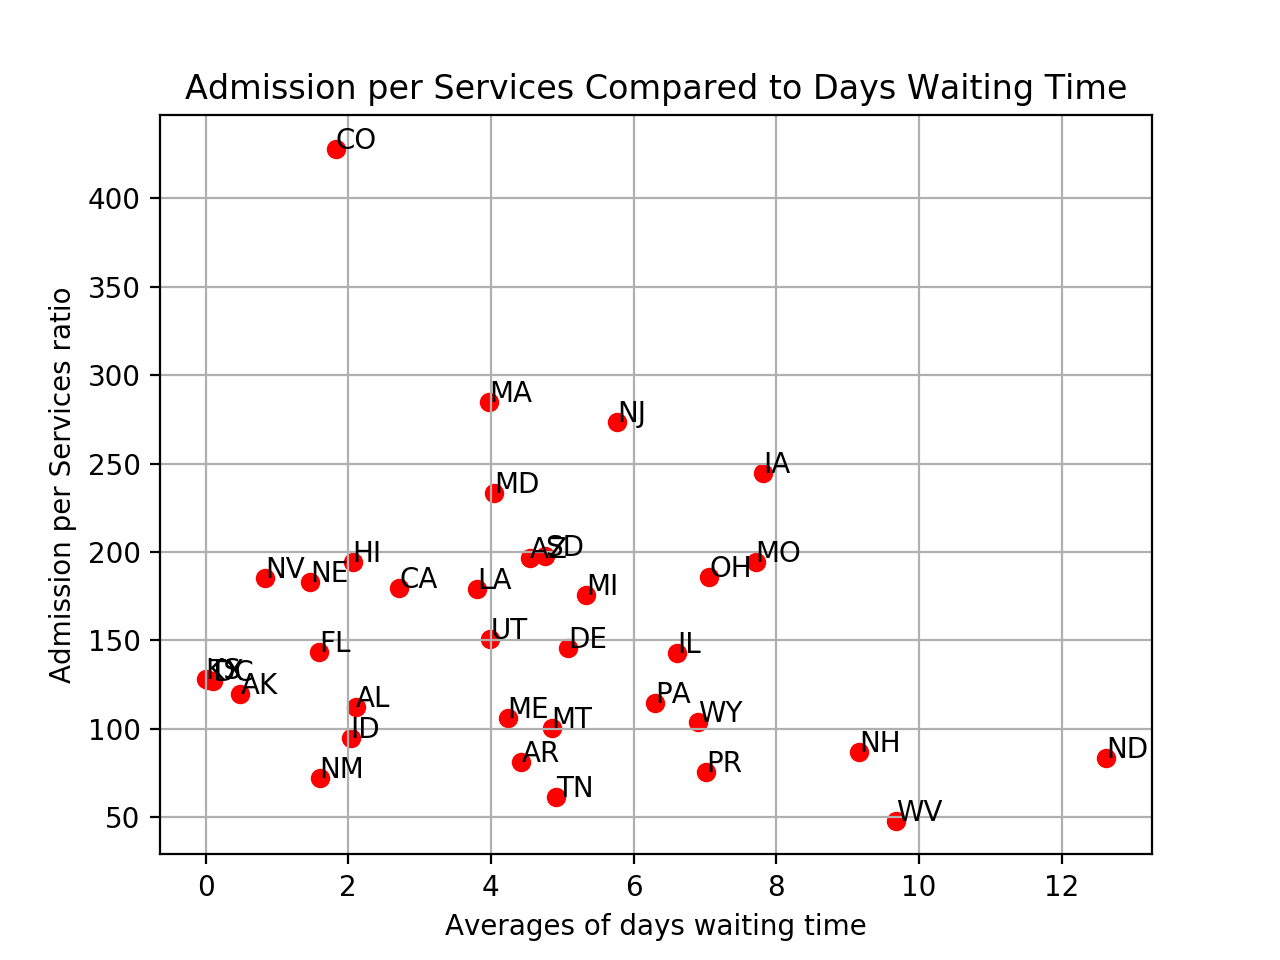

In [38]:
x=daywait_stat.DAYWAIT
y=daywait_stat.ProvPerAdmission
n=daywait_stat.LST

fig, ax = plt.subplots()
ax.scatter(x, y, c='r')

ax.set_ylabel('Admission per Services ratio')
ax.set_xlabel('Averages of days waiting time')
ax.set_title('Admission per Services Compared to Days Waiting Time')

plt.grid(True)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

#to zoom in near (0,0) point
#plt.axis([0,1,0,200])
#plt.savefig('../Week_3/daywait_scatter.jpg')

plt.show()
